In [15]:
# Import packages and Functions.py
import sys
sys.path.append('../') 
from Functions import * 

In [16]:
# Matrix Y, containing all possilbe edges
Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

alpha = 5 # Change alpha here
num_samples = 4
dim = 2

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(dim)
identity_matrix = np.eye(dim)
cov_matrix = identity_matrix

In [18]:
# Define Loss_function as in Functions.py but only take the input point and not Y-matrix
def Loss_function_fast(point):
    Y_np = np.array(Y)
    connections = Y_np[:, 0]
    indices_a = Y_np[:, 1]
    indices_b = Y_np[:, 2]

    points_a = [point[i] for i in indices_a]
    points_b = [point[i] for i in indices_b]
    points_a_np = np.array(points_a)
    points_b_np = np.array(points_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)

    sigmoid_value = 1 / (1 + np.exp(-connections * (alpha - distances)))
    return np.sum(np.log(sigmoid_value))

In [19]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    # Use Autograd
    grad_func = value_and_grad(Loss_function_fast)
    Autograd = grad_func(point)

    # Use Gradient_function
    grad_matrix = np.array([[Gradient_function_fast(1,dim,Y,point,alpha)],
                            [Gradient_function_fast(2,dim,Y,point,alpha)],
                            [Gradient_function_fast(3,dim,Y,point,alpha)],
                            [Gradient_function_fast(4,dim,Y,point,alpha)]])
    # Caculate the error
    hist[n] = np.sum(Autograd[1][1]-grad_matrix[0]+Autograd[1][2]-grad_matrix[1]+Autograd[1][3]-grad_matrix[2]+Autograd[1][4]-grad_matrix[3])


(array([  1.,   2.,   0.,   1.,   4.,   0.,   2.,   7.,   3.,   9.,  29.,
          7.,  21.,  64.,  39., 183., 278., 111., 115.,  63.,   6.,  18.,
         20.,   2.,   5.,   3.,   1.,   3.,   1.,   2.]),
 array([-4.88498131e-15, -4.58892184e-15, -4.29286236e-15, -3.99680289e-15,
        -3.70074342e-15, -3.40468394e-15, -3.10862447e-15, -2.81256500e-15,
        -2.51650552e-15, -2.22044605e-15, -1.92438658e-15, -1.62832710e-15,
        -1.33226763e-15, -1.03620816e-15, -7.40148683e-16, -4.44089210e-16,
        -1.48029737e-16,  1.48029737e-16,  4.44089210e-16,  7.40148683e-16,
         1.03620816e-15,  1.33226763e-15,  1.62832710e-15,  1.92438658e-15,
         2.22044605e-15,  2.51650552e-15,  2.81256500e-15,  3.10862447e-15,
         3.40468394e-15,  3.70074342e-15,  3.99680289e-15]),
 <BarContainer object of 30 artists>)

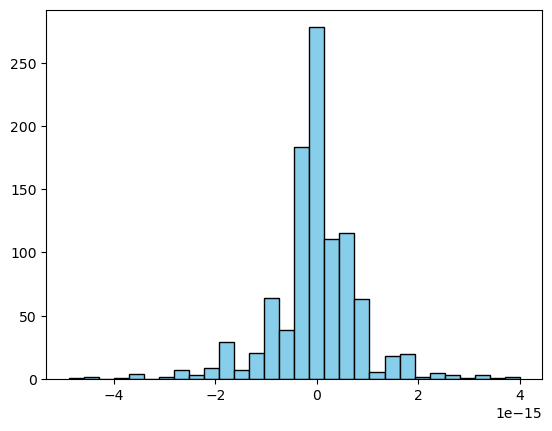

In [20]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')